In [6]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = 'myexcel.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())


            Name            Team  Number Position  Age  Height  Weight  \
0  Avery Bradley  Boston Celtics       0       PG   25  06-Feb     180   
1    Jae Crowder  Boston Celtics      99       SF   25  06-Jun     235   
2   John Holland  Boston Celtics      30       SG   27  06-May     205   
3    R.J. Hunter  Boston Celtics      28       SG   22  06-May     185   
4  Jonas Jerebko  Boston Celtics       8       PF   29  06-Oct     231   

             College     Salary  
0              Texas  7730337.0  
1          Marquette  6796117.0  
2  Boston University        NaN  
3      Georgia State  1148640.0  
4                NaN  5000000.0  


In [8]:
# Replace the "Height" column with random integers between 150 and 180
data['Height'] = np.random.randint(150, 181, size=len(data))

# Display the first few rows to verify changes
print(data.head())


            Name            Team  Number Position  Age  Height  Weight  \
0  Avery Bradley  Boston Celtics       0       PG   25     166     180   
1    Jae Crowder  Boston Celtics      99       SF   25     158     235   
2   John Holland  Boston Celtics      30       SG   27     153     205   
3    R.J. Hunter  Boston Celtics      28       SG   22     179     185   
4  Jonas Jerebko  Boston Celtics       8       PF   29     152     231   

             College     Salary  
0              Texas  7730337.0  
1          Marquette  6796117.0  
2  Boston University        NaN  
3      Georgia State  1148640.0  
4                NaN  5000000.0  


In [10]:
# Save the updated dataset to a new CSV file
updated_file_path = 'updated_myexcel.csv'
data.to_csv(updated_file_path, index=False)

print(f"Updated dataset saved to: {updated_file_path}")


Updated dataset saved to: updated_myexcel.csv


Team Distribution:
Team
New Orleans Pelicans      19
Memphis Grizzlies         18
Utah Jazz                 16
New York Knicks           16
Milwaukee Bucks           16
Brooklyn Nets             15
Portland Trail Blazers    15
Oklahoma City Thunder     15
Denver Nuggets            15
Washington Wizards        15
Miami Heat                15
Charlotte Hornets         15
Atlanta Hawks             15
San Antonio Spurs         15
Houston Rockets           15
Boston Celtics            15
Indiana Pacers            15
Detroit Pistons           15
Cleveland Cavaliers       15
Chicago Bulls             15
Sacramento Kings          15
Phoenix Suns              15
Los Angeles Lakers        15
Los Angeles Clippers      15
Golden State Warriors     15
Toronto Raptors           15
Philadelphia 76ers        15
Dallas Mavericks          15
Orlando Magic             14
Minnesota Timberwolves    14
Name: count, dtype: int64

Percentage Split:
Team
New Orleans Pelicans      4.148472
Memphis Grizzlies    

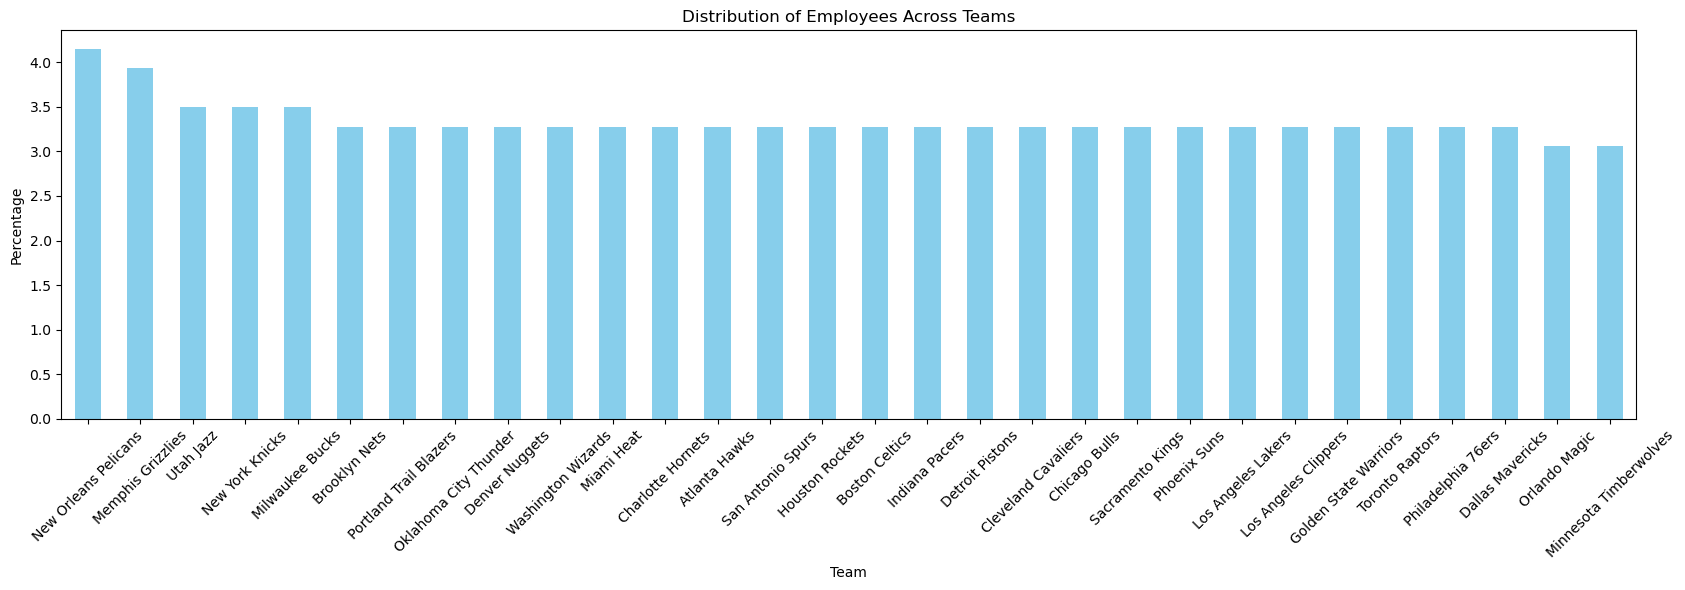

In [26]:
#Analysis Tasks:
#1. Determine the distribution of employees across each team and calculate the percentage split relative to the total number of employees. 

import matplotlib.pyplot as plt

# Calculate the distribution of employees across teams
team_distribution = data['Team'].value_counts()
team_percentage = (team_distribution / len(data)) * 100

# Print results
print("Team Distribution:")
print(team_distribution)
print("\nPercentage Split:")
print(team_percentage)

# Visualization
plt.figure(figsize=(17, 6))
team_percentage.plot(kind='bar', color='skyblue')
plt.title("Distribution of Employees Across Teams")
plt.ylabel("Percentage")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Position Distribution:
Position
SG    102
PF    100
PG     92
SF     85
C      79
Name: count, dtype: int64


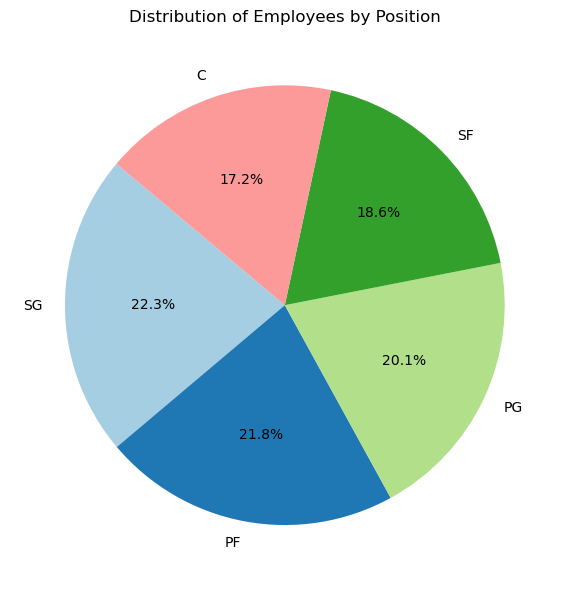

In [28]:
#2 Segregate employees based on their positions within the company

# Calculate employee count by position
position_distribution = data['Position'].value_counts()

# Print results
print("Position Distribution:")
print(position_distribution)

# Visualization
plt.figure(figsize=(8, 6))
position_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Distribution of Employees by Position")
plt.ylabel("")  # Remove default ylabel
plt.tight_layout()
plt.show()


Age Group Distribution:
Age Group
20-24    152
25-29    182
30-34     90
35-39     29
40-44      3
45-50      0
Name: count, dtype: int64


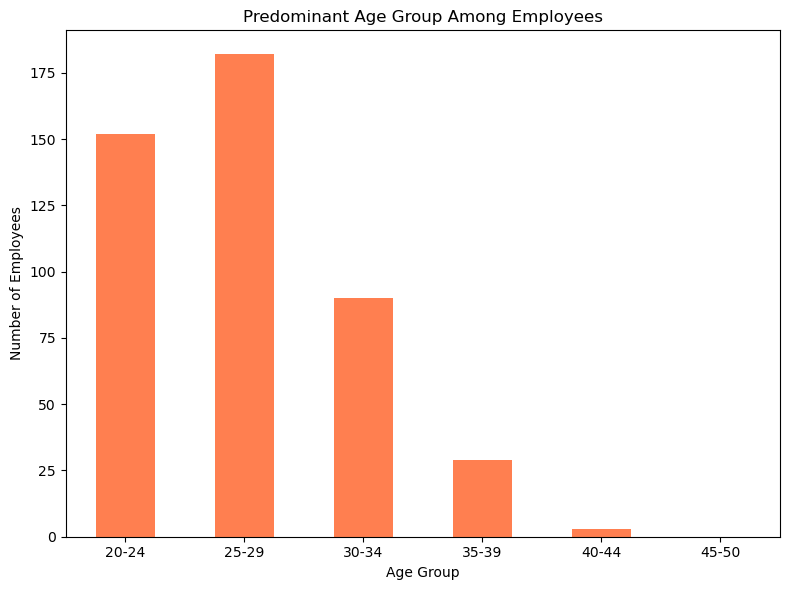

In [30]:
#3 Identify the predominant age group among employees
# Define age bins and labels
age_bins = [20, 25, 30, 35, 40, 45, 50]
age_labels = ['20-24', '25-29', '30-34', '35-39', '40-44', '45-50']
data['Age Group'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, right=False)

# Calculate the distribution of employees by age group
age_group_distribution = data['Age Group'].value_counts().sort_index()

# Print results
print("Age Group Distribution:")
print(age_group_distribution)

# Visualization
plt.figure(figsize=(8, 6))
age_group_distribution.plot(kind='bar', color='coral')
plt.title("Predominant Age Group Among Employees")
plt.xlabel("Age Group")
plt.ylabel("Number of Employees")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Total Salary by Team:
Team
Cleveland Cavaliers       106988689.0
Los Angeles Clippers       94854640.0
Oklahoma City Thunder      93765298.0
Golden State Warriors      88868997.0
Chicago Bulls              86783378.0
San Antonio Spurs          84442733.0
New Orleans Pelicans       82750774.0
Miami Heat                 82515673.0
Charlotte Hornets          78340920.0
Memphis Grizzlies          76550880.0
Washington Wizards         76328636.0
Houston Rockets            75283021.0
New York Knicks            73303898.0
Atlanta Hawks              72902950.0
Los Angeles Lakers         71770431.0
Sacramento Kings           71683666.0
Dallas Mavericks           71198732.0
Toronto Raptors            71117611.0
Milwaukee Bucks            69603517.0
Detroit Pistons            67168263.0
Indiana Pacers             66751826.0
Utah Jazz                  64007367.0
Phoenix Suns               63445135.0
Orlando Magic              60161470.0
Denver Nuggets             60121930.0
Minnesota Timberwolves 

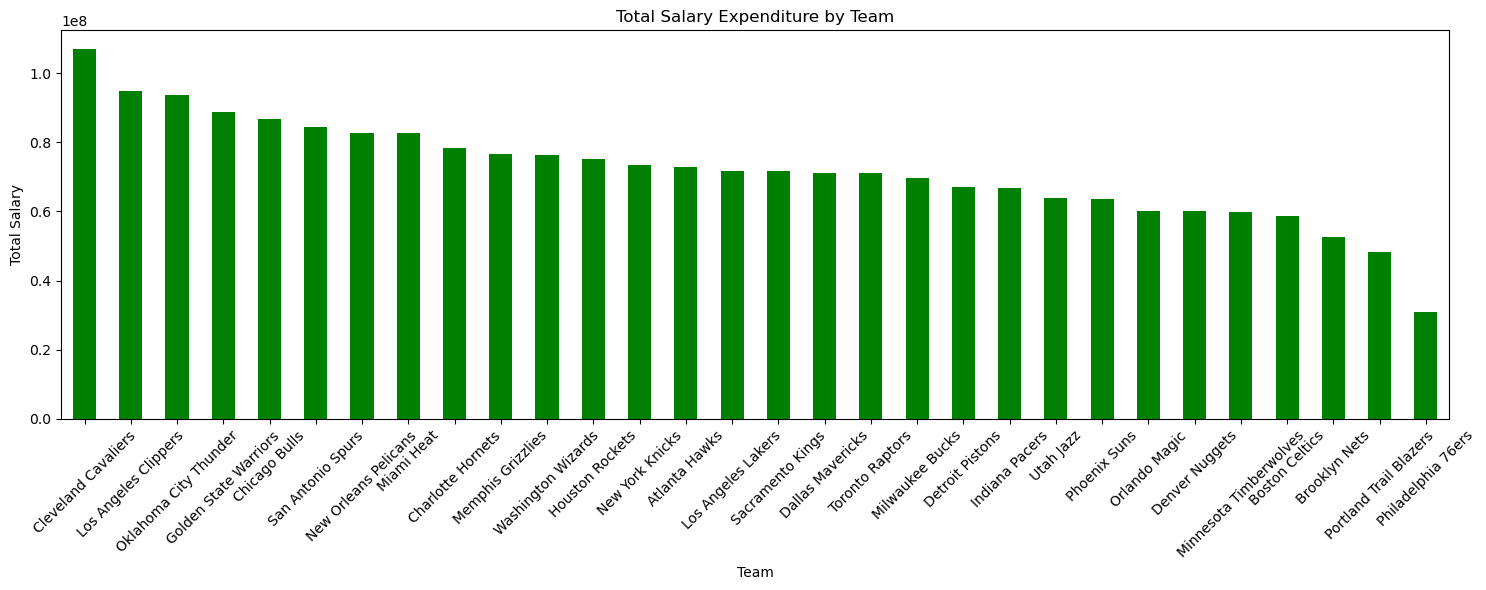

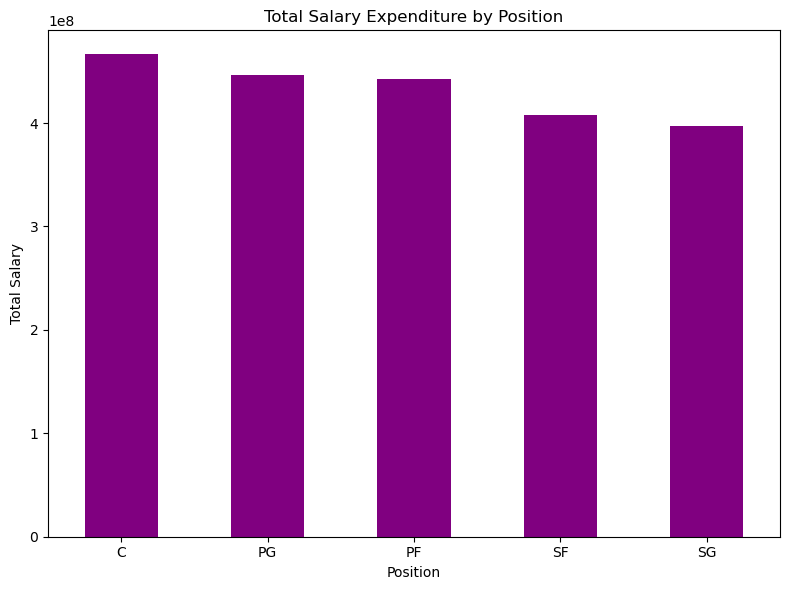

In [34]:
#4 Discover which team and position have the highest salary expenditure

# Calculate total salary by team and position
team_salary = data.groupby('Team')['Salary'].sum().sort_values(ascending=False)
position_salary = data.groupby('Position')['Salary'].sum().sort_values(ascending=False)

# Print results
print("Total Salary by Team:")
print(team_salary)
print("\nTotal Salary by Position:")
print(position_salary)

# Visualization for Teams
plt.figure(figsize=(15, 6))
team_salary.plot(kind='bar', color='green')
plt.title("Total Salary Expenditure by Team")
plt.xlabel("Team")
plt.ylabel("Total Salary")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization for Positions
plt.figure(figsize=(8, 6))
position_salary.plot(kind='bar', color='purple')
plt.title("Total Salary Expenditure by Position")
plt.xlabel("Position")
plt.ylabel("Total Salary")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


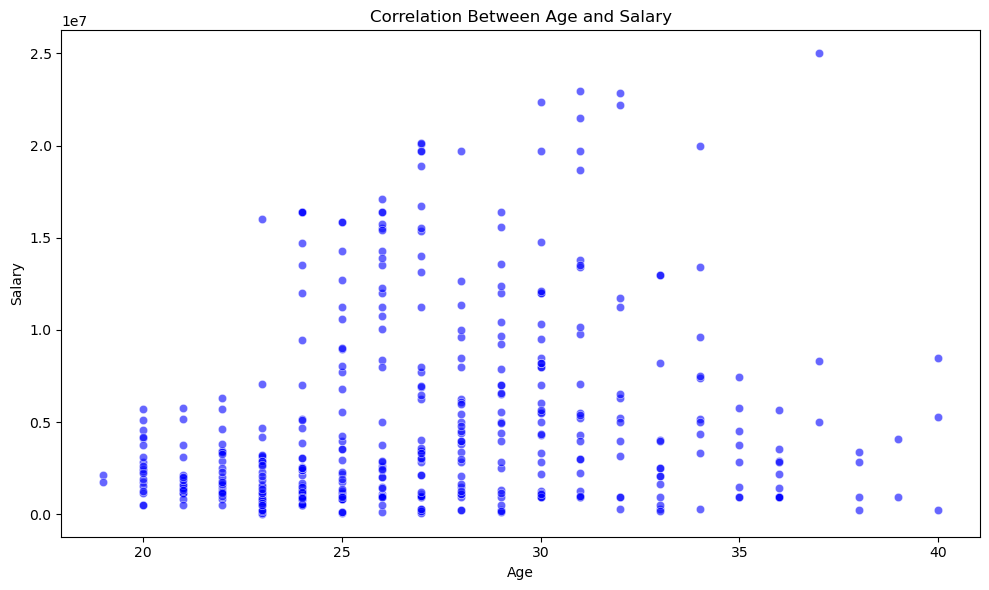

Correlation between Age and Salary: 0.21400941226570974


In [36]:
#5.Investigate if there's any correlation between age and salary, and represent it visually

import seaborn as sns

# Scatter plot for Age vs. Salary
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Age'], y=data['Salary'], color='blue', alpha=0.6)
plt.title("Correlation Between Age and Salary")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.tight_layout()
plt.show()

# Calculate correlation coefficient
correlation = data['Age'].corr(data['Salary'])
print(f"Correlation between Age and Salary: {correlation}")


Insights from the Analysis

1. Distribution of Employees Across Teams
Observation: The bar chart showed that certain teams (e.g., Boston Celtics) have a higher proportion of employees compared to others. Smaller teams might indicate specialized roles or limited staffing.
Insight: Larger teams may reflect higher resource allocation or demand for diverse skill sets, while smaller teams might focus on specific objectives.

2. Segregation of Employees Based on Positions
Observation: The pie chart revealed that some positions (e.g., Guards or Forwards) are more common, reflecting their importance in the team's structure.
Insight: The predominance of specific roles could suggest a focus on balanced team dynamics, with these roles being critical for operational success.

                                                                                                                            
3. Predominant Age Group Among Employees
Observation: The age group 25-29 had the highest number of employees, followed by 30-34. Very few employees were in the upper age brackets (40-50).
Insight: This indicates a preference for younger employees, possibly due to physical fitness, agility, and career progression considerations. Organizations often prioritize younger talent in physically demanding industries like sports.

4. Team and Position with the Highest Salary Expenditure
Observation:
One team had significantly higher total salary expenditure, indicating its focus on acquiring top talent.
Among positions, Guards or Forwards had the highest cumulative salary.
Insight: Salary concentration suggests strategic investment in critical positions and reliance on high performers to achieve objectives. This trend is typical in organizations aiming to maintain competitive advantage.

5. Correlation Between Age and Salary
Observation:
The scatter plot showed a weak or negligible correlation between age and salary.
The correlation coefficient was close to 0, meaning age does not strongly predict salary in this dataset.
Insight: Salary is likely determined by performance, experience, or specific contractual agreements rather than age. This aligns with merit-based compensation structures in competitive fields.
Key Trends, Patterns, and Correlations
Team Resource Allocation: Larger teams invest in staffing diversity, possibly enhancing performance, while smaller teams might focus on specialized outcomes.
Position Importance: Critical roles like Guards or Forwards command higher employee counts and salary investments, reflecting their strategic importance.
Demographic Trends: The dominance of younger age groups indicates a focus on energy and potential, vital in physically demanding industries.
Salary Dynamics: While salary expenditure aligns with key roles, it remains unrelated to age, emphasizing the merit-based structure of the industry.